#COMPANY DATA

#A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1) (1).csv


In [3]:
data=pd.read_csv('Company_Data (1).csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
le=LabelEncoder()
data['ShelveLoc']=le.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,0,50,12,Yes,Yes


In [10]:
data['Urban']=le.fit_transform(data['Urban'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,Yes
1,11.22,111,48,16,260,83,1,65,10,1,Yes
2,10.06,113,35,10,269,80,2,59,12,1,Yes
3,7.40,117,100,4,466,97,2,55,14,1,Yes
4,4.15,141,64,3,340,128,0,38,13,1,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,Yes
396,6.14,139,23,3,37,120,2,55,11,0,Yes
397,7.41,162,26,12,368,159,2,40,18,1,Yes
398,5.94,100,79,7,284,95,0,50,12,1,Yes


In [11]:
data['US']=le.fit_transform(data['US'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


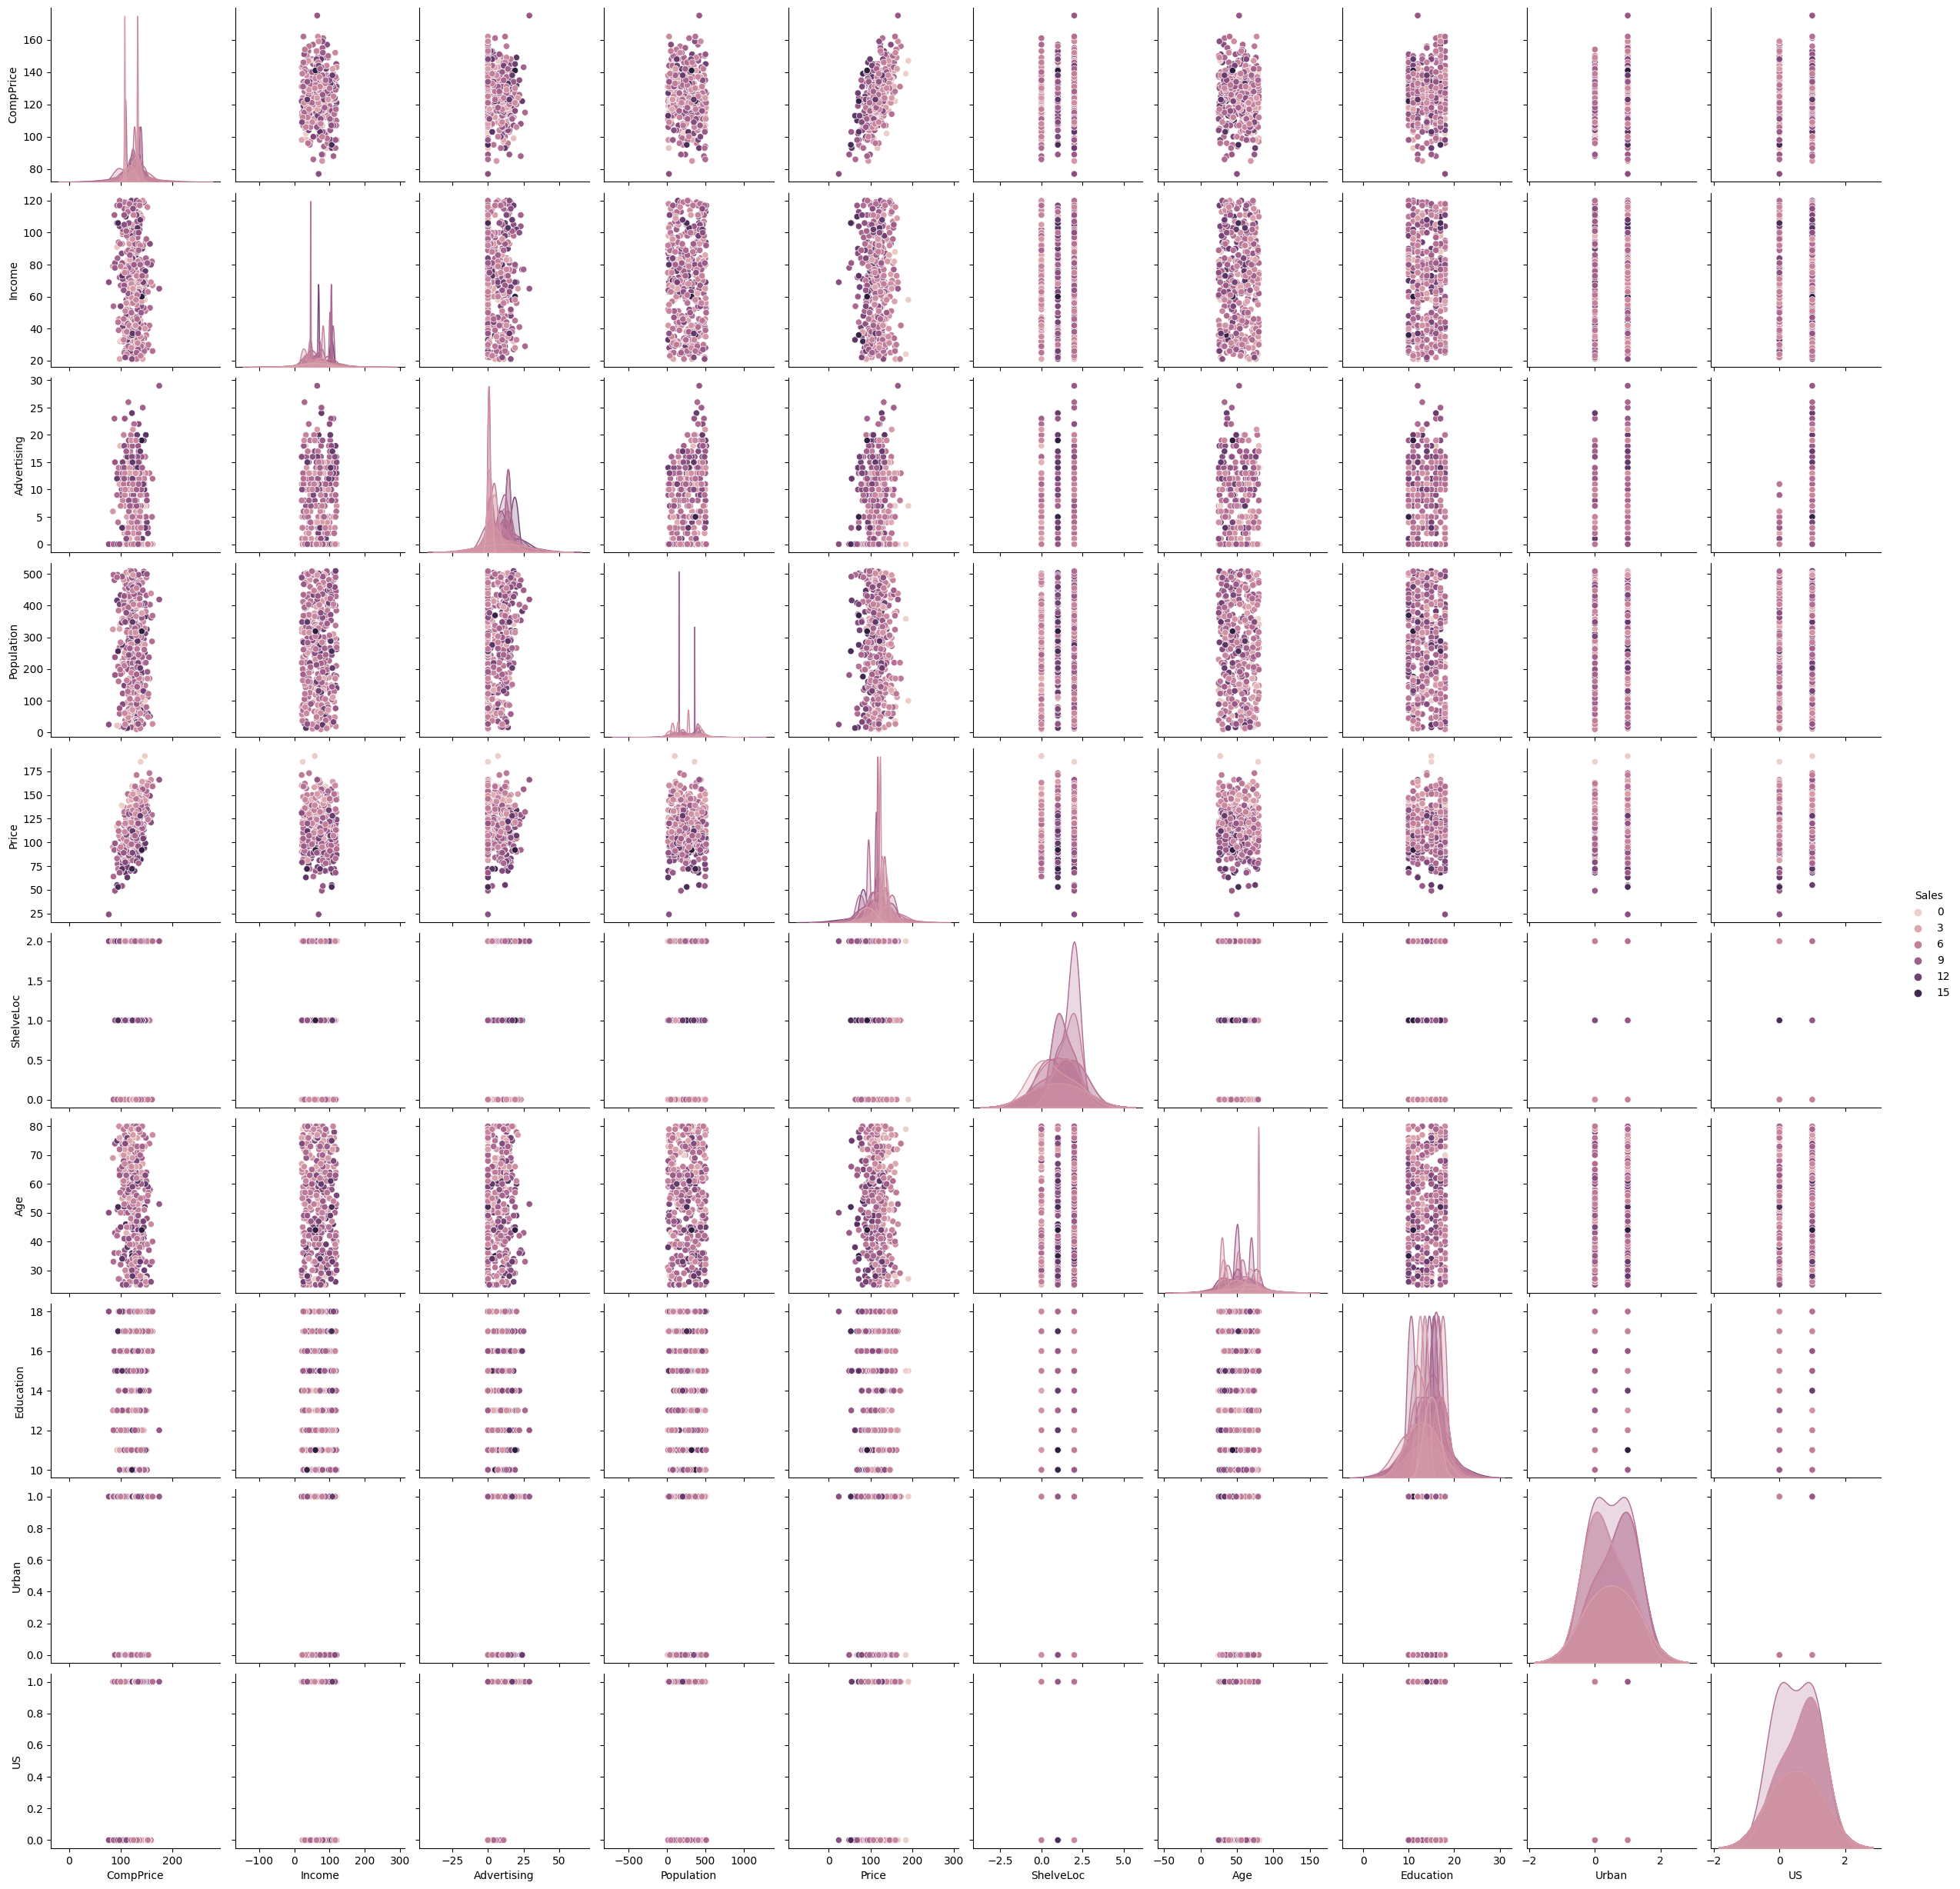

In [13]:
sns.pairplot(data, hue='Sales')

<Axes: >

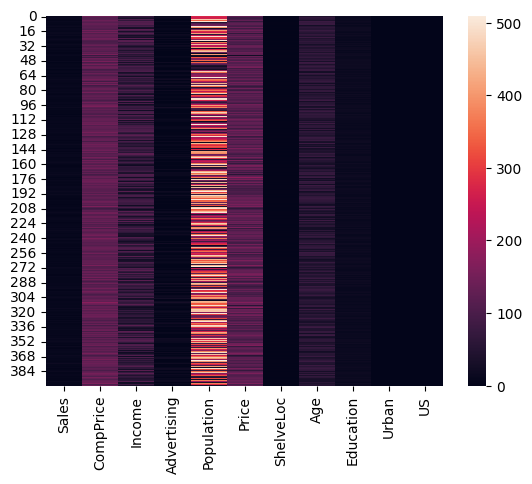

In [14]:
sns.heatmap(data)

<ipython-input-15-40c10e8c4001>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

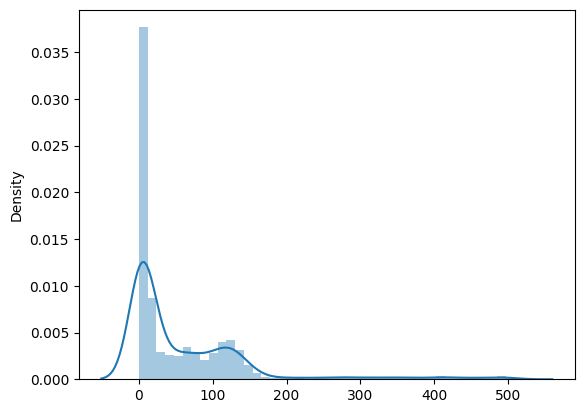

In [15]:
sns.distplot(data)

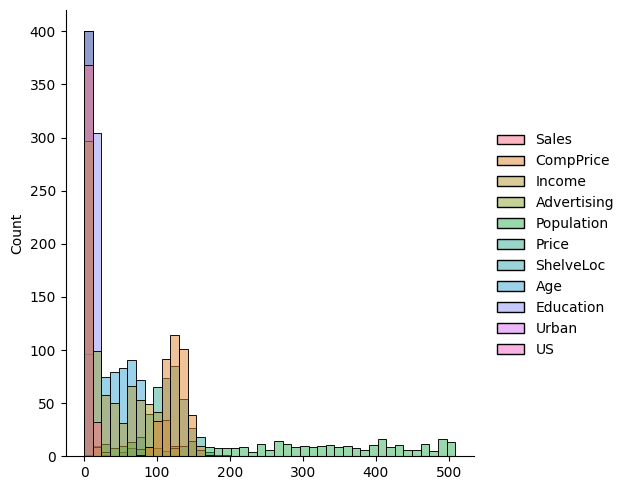

In [16]:
sns.displot(data)

In [17]:
data['Sales']=data['Sales'].apply (lambda x:1 if x>7.00 else 0)

In [18]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [19]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x,y

(     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
 0          138      73           11         276    120          0   42   
 1          111      48           16         260     83          1   65   
 2          113      35           10         269     80          2   59   
 3          117     100            4         466     97          2   55   
 4          141      64            3         340    128          0   38   
 ..         ...     ...          ...         ...    ...        ...  ...   
 395        138     108           17         203    128          1   33   
 396        139      23            3          37    120          2   55   
 397        162      26           12         368    159          2   40   
 398        100      79            7         284     95          0   50   
 399        134      37            0          27    120          1   49   
 
      Education  Urban  US  
 0           17      1   1  
 1           10      1   1  
 2         

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [21]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
359,130,62,11,396,130,0,66,14,1,1
300,116,78,1,158,99,2,45,11,1,1
145,144,63,11,27,117,2,47,17,1,1
265,130,35,10,402,129,0,39,17,1,1
222,136,119,6,178,145,2,35,13,1,1
...,...,...,...,...,...,...,...,...,...,...
330,122,59,0,501,112,0,32,14,0,0
364,122,21,16,488,131,1,30,14,1,1
60,122,102,19,469,123,0,29,13,1,1
376,141,60,19,319,92,1,44,11,1,1


In [22]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
251,139,111,5,310,132,0,62,13,1,1
69,127,59,0,339,99,2,65,12,1,0
90,115,22,0,491,103,2,64,11,0,0
149,121,120,13,140,87,2,56,11,1,1
367,95,106,0,256,53,1,52,17,1,0
...,...,...,...,...,...,...,...,...,...,...
128,133,100,3,350,126,0,55,13,1,1
3,117,100,4,466,97,2,55,14,1,1
178,104,71,14,89,81,2,25,14,0,1
123,127,103,0,125,155,1,29,15,0,1


In [23]:
y_train

359    0
300    1
145    1
265    0
222    1
      ..
330    0
364    1
60     1
376    1
280    0
Name: Sales, Length: 320, dtype: int64

In [24]:
y_test

251    0
69     1
90     0
149    1
367    1
      ..
128    0
3      1
178    1
123    1
220    1
Name: Sales, Length: 80, dtype: int64

In [25]:
x_train.shape

(320, 10)

In [26]:
x_test.shape

(80, 10)

In [27]:
y_train.shape

(320,)

In [28]:
y_test.shape

(80,)

In [29]:
model= RandomForestClassifier(n_estimators=100,max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [30]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [31]:
df=pd.DataFrame({'actual':y_test,'predict':y_pred})
df

,actual,predict
251,0,0
69,1,1
90,0,0
149,1,1
367,1,1
...,...,...
128,0,0
3,1,1
178,1,1
123,1,1


In [32]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.85

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.84      0.91      0.88        47

    accuracy                           0.85        80
   macro avg       0.85      0.84      0.84        80
weighted avg       0.85      0.85      0.85        80



#BAGGING CLASSIFIER

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
model=BaggingClassifier(classifier,n_estimators=150)
model.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

In [35]:
y_pred_bc=model.predict(x_test)
y_pred_bc

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [36]:
df=pd.DataFrame({'actual':y_test,'predict':y_pred_bc})
df

,actual,predict
251,0,0
69,1,1
90,0,0
149,1,1
367,1,1
...,...,...
128,0,0
3,1,1
178,1,1
123,1,1


In [37]:
accu=accuracy_score(y_test,y_pred_bc)
accu

0.825

In [38]:
print(classification_report(y_test,y_pred_bc))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.85      0.85      0.85        47

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80

